#  Model Random Forest

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

### 1) Reading of the processed dataset

In [57]:
X_train = pd.read_csv("/workspaces/MLRandom-Forest-PilarZarco/data/processed/X_train.csv")
y_train = pd.read_csv("/workspaces/MLRandom-Forest-PilarZarco/data/processed/y_train.csv")

X_test = pd.read_csv("/workspaces/MLRandom-Forest-PilarZarco/data/processed/X_test.csv")
y_test = pd.read_csv("/workspaces/MLRandom-Forest-PilarZarco/data/processed/y_test.csv")

df = pd.read_csv("/workspaces/MLRandom-Forest-PilarZarco/data/raw/diabete.csv")

y_test = list(y_test["Outcome"])
y_train = list(y_train["Outcome"])

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,106,56,27,165,29.0,0.426,22
1,1,89,66,23,94,28.1,0.167,21
2,1,116,78,29,180,36.1,0.496,25
3,6,115,60,39,125,33.7,0.245,40
4,5,136,82,29,125,32.3,0.640,69


### 2) Model initialisation and training

In [58]:
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score  

# Definition of hyperparameter search space:
hyperparams = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_leaf_nodes': [None, 10, 20, 30],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2', None],
}

# Exhaustive search hyperparameter
accs = []
for combination in ParameterGrid(hyperparams):
    model = RandomForestClassifier(**combination)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accs.append(accuracy_score(y_train, y_pred))


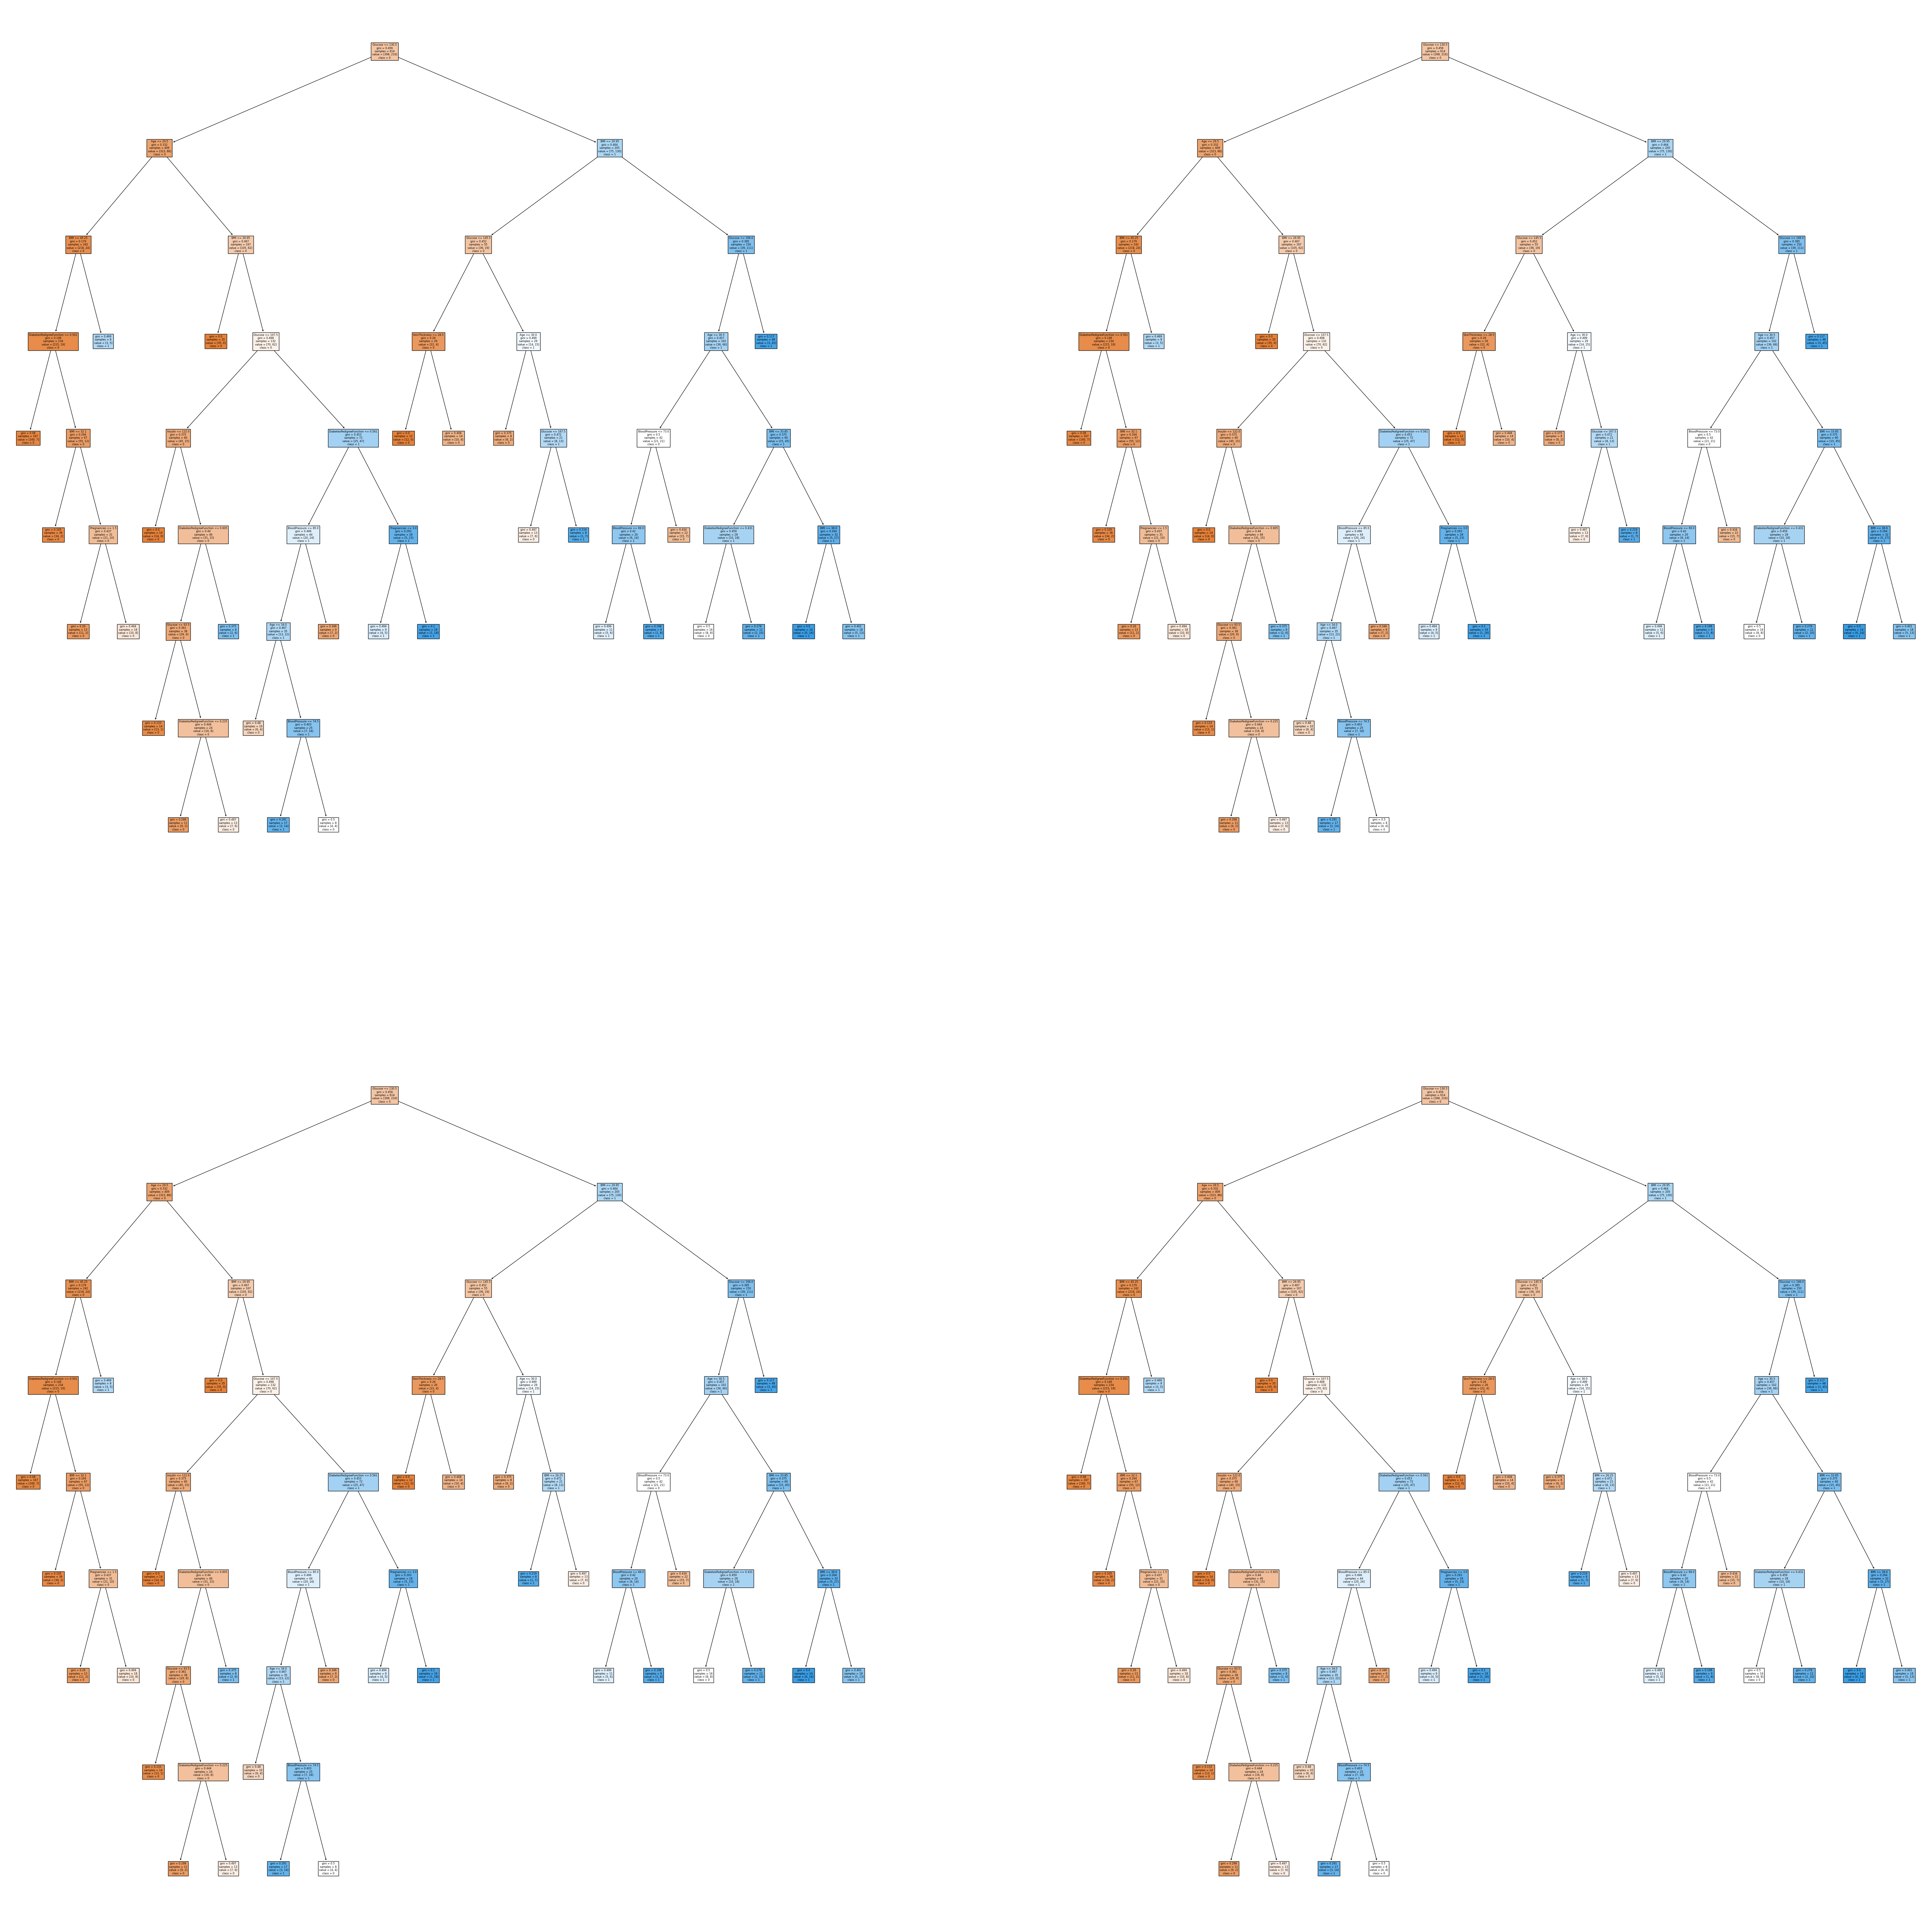

In [59]:
# Show the first 4 trees out of the 100 generated (default).
import matplotlib.pyplot as plt
from sklearn import tree

fig, axis = plt.subplots(2, 2, figsize = (80, 80))

tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

### 3) Model prediction

In [60]:
# Selection of the best model and final training:
best_acc = max(accs)
best_combination = list(ParameterGrid(hyperparams))[accs.index(best_acc)]
best_model = RandomForestClassifier(**best_combination)
best_model.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
# Predictions in the test set and training set
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Print predictions
print(y_pred_test)
print(y_pred_train)

[0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0
 1 0 0 1 0 0]
[0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 0 

In [62]:
# Calculate the accuracy in the test set
accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate the accuracy in the training set
accuracy_train =accuracy_score(y_train, y_pred_train)

print("Accuracy Test:", accuracy_test, "\nAccuracy Train:", accuracy_train)

Accuracy Test: 0.7987012987012987 
Accuracy Train: 0.8485342019543974


In [63]:
# Obtain the best hyperparameters
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model, hyperparams, scoring='accuracy', cv=5)

# Hide warnings to keep the code clean
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Perform grid search
grid.fit(X_train, y_train)

# Obtain the best hyperparameters found
best_hyperparams = grid.best_params_

# Prints the best combination of hyperparameters 
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 10, 'min_samples_leaf': 8, 'min_samples_split': 5, 'n_estimators': 50}


In [64]:
# Create a DataFrame with the search results in a grid
cv_results = pd.DataFrame(grid.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016459,0.005538,0.002122,0.000681,True,None,sqrt,None,1,2,10,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.747967,0.731707,0.634146,0.747967,0.762295,0.724817,0.046358,5999
1,0.059797,0.002046,0.003911,0.000105,True,None,sqrt,None,1,2,50,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.731707,0.772358,0.666667,0.772358,0.795082,0.747634,0.045350,4917
2,0.132190,0.007920,0.007722,0.001920,True,None,sqrt,None,1,2,100,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.747967,0.772358,0.674797,0.772358,0.778689,0.749234,0.038677,4760
3,0.259932,0.032707,0.014003,0.002721,True,None,sqrt,None,1,2,200,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.747967,0.796748,0.674797,0.764228,0.770492,0.750846,0.041143,4609
4,0.014235,0.001584,0.002135,0.000382,True,None,sqrt,None,1,5,10,"{'bootstrap': True, 'max_depth': None, 'max_fe...",0.723577,0.788618,0.691057,0.780488,0.770492,0.750846,0.037442,4609


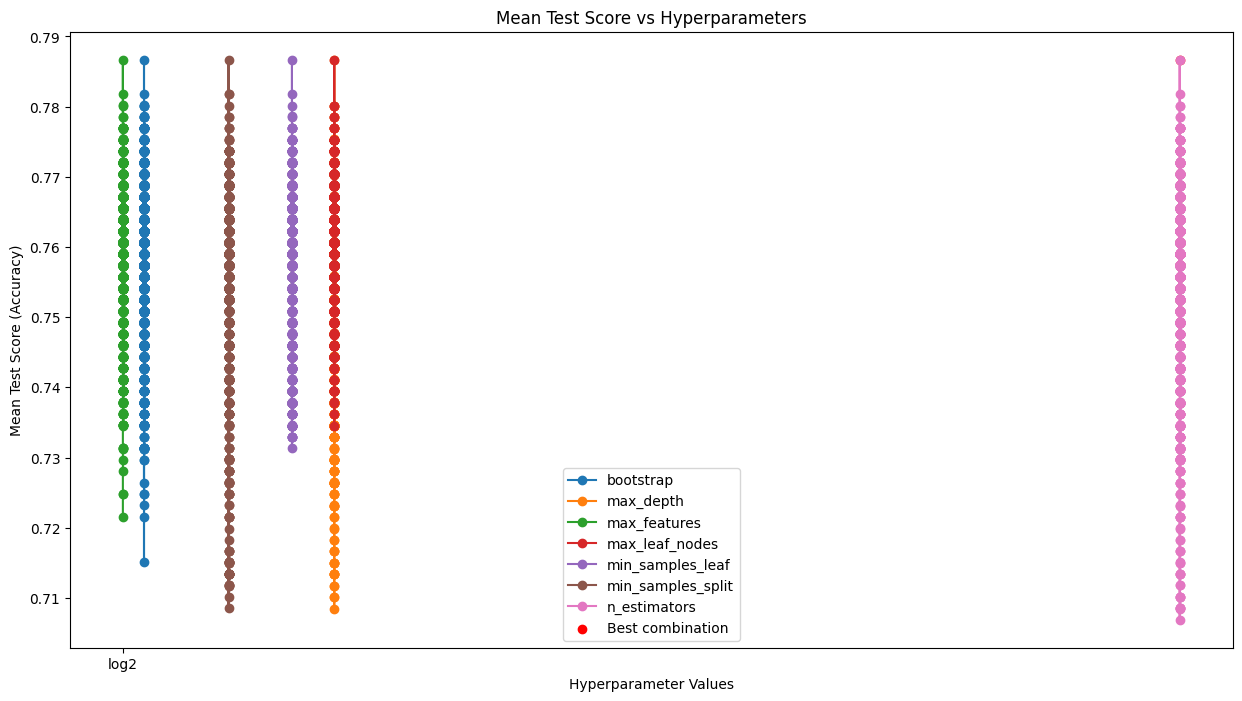

In [82]:
# Create a single graph
fig, ax = plt.subplots(figsize=(15, 8))

hyperparams_to_plot = list(best_hyperparams.keys())

for param_to_plot in hyperparams_to_plot:
    # Check if expected column exists in cv_results
    if f'param_{param_to_plot}' in cv_results.columns:
        param_results = cv_results[cv_results[f'param_{param_to_plot}'] == best_hyperparams[param_to_plot]]

        # Plot results only if there is data for the hyperparameter
        if not param_results.empty:
            ax.plot(param_results[f'param_{param_to_plot}'], param_results['mean_test_score'], marker='o', label=f'{param_to_plot}')

# Marking the best combination
ax.scatter(best_hyperparams[param_to_plot], grid.best_score_, color='red', label='Best combination')

ax.set_title('Mean Test Score vs Hyperparameters')
ax.set_xlabel('Hyperparameter Values')
ax.set_ylabel('Mean Test Score (Accuracy)')
ax.legend()

plt.show()


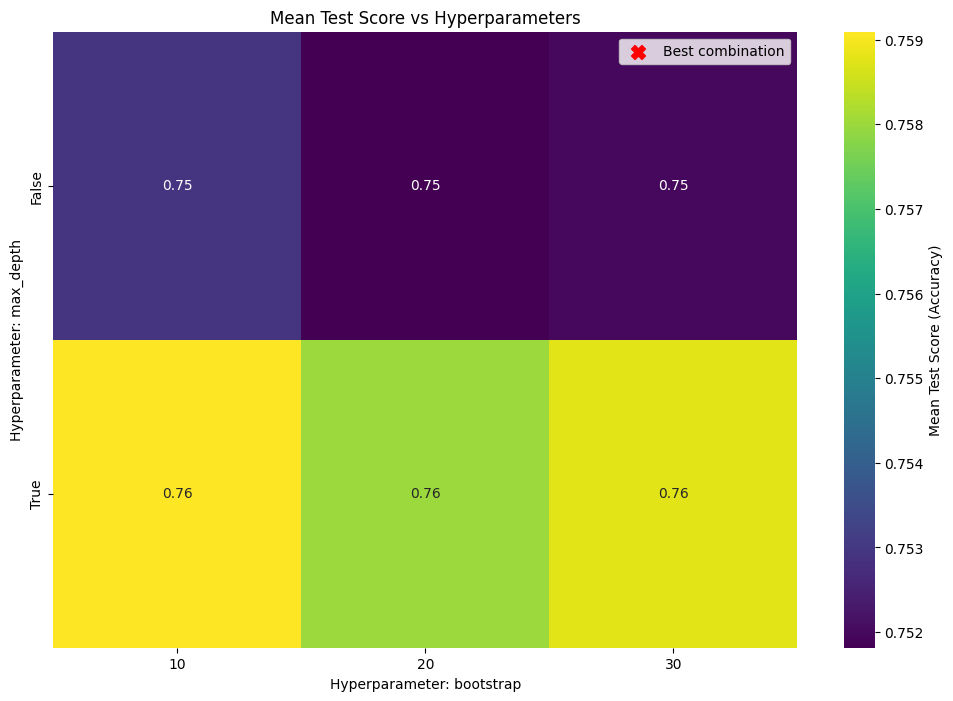

In [85]:
import seaborn as sns

# Create a DataFrame with relevant data
heatmap_data = cv_results.pivot_table(index=f'param_{hyperparams_to_plot[0]}', columns=f'param_{hyperparams_to_plot[1]}', values='mean_test_score')

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', cbar_kws={'label': 'Mean Test Score (Accuracy)'})

# Mark the best combination
best_combination_x = best_hyperparams[hyperparams_to_plot[0]]
best_combination_y = best_hyperparams[hyperparams_to_plot[1]]
plt.scatter(best_combination_x, best_combination_y, marker='X', color='red', s=100, label='Best combination')

# Adjust labels and legend
plt.title('Mean Test Score vs Hyperparameters')
plt.xlabel(f'Hyperparameter: {hyperparams_to_plot[0]}')
plt.ylabel(f'Hyperparameter: {hyperparams_to_plot[1]}')
plt.legend()

# Show the plot
plt.show()


### 4) Save the model

In [ ]:
from pickle import dump

dump(model, open("/workspaces/MLRandom-Forest-PilarZarco/models/random_forest_classifier_71.sav", "wb"))